In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7, 8.27)})

In [26]:
data = pd.read_csv('../Data/pre_aggregatedata.csv')
data.tail(5)

,index,description,origin,status,car_mileage,car_color,car_seats,gear,car_year,car_price,style,model,fuel,brand_name,region_name,url_image,website,month
68838,47499,✓ Miễn phí thuế trước bạ ✓ Vay miễn lãi 0% ✓ G...,Việt Nam,Mới,0.0,Đen,7.0,Tự động,2021.0,1.298000e+09,SUV / Cross over,Lux Sa 2.0,Xăng,VinFast,Hà Nội,https://bonbanh.com/uploads/users/519120/car/3...,bonbanh,12
68839,47201,VINFAST FADIL Ông vua phân khúc hạng A: 1.Fadi...,Việt Nam,Mới,0.0,Xám,5.0,Tự động,2021.0,4.130000e+08,Hatchback,Fadil,Xăng,VinFast,Hà Nội,https://bonbanh.com/uploads/users/518557/car/3...,bonbanh,12
68840,46683,GIÁ SIÊU HOT TẶNG QUÀ NHÂN ĐÔI Báo giá ngay...,Việt Nam,Mới,0.0,Đỏ,5.0,Tự động,2021.0,9.480000e+08,Sedan,Lux,Xăng,VinFast,Tp Hồ Chí Minh,https://bonbanh.com/uploads/users/551096/car/3...,bonbanh,12
68841,46620,"Lux A giảm 10% giá xe, tặng 100% thuế trước bạ...",Việt Nam,Mới,0.0,Nâu,5.0,Tự động,2021.0,9.480000e+08,Sedan,Lux,Xăng,VinFast,Phú Thọ,https://bonbanh.com/uploads/users/537019/car/3...,bonbanh,12
68842,46595,Vinfast Fadil bản cao cấp ** CTKM trả góp tối ...,Việt Nam,Mới,0.0,Xám,5.0,Tự động,2021.0,4.490000e+08,Hatchback,Fadil,Xăng,VinFast,Hà Nam,https://bonbanh.com/uploads/users/509606/car/3...,bonbanh,12


In [4]:
print(data.origin.unique())
len(data)

['Nước khác' 'Việt Nam' nan 'Hàn Quốc' 'Trung Quốc' 'Nhật Bản' 'Mỹ' 'Đức'
 'Đài Loan' 'Thái Lan' 'Ấn Độ']


68843

# ORIGIN

/home/hadoop/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


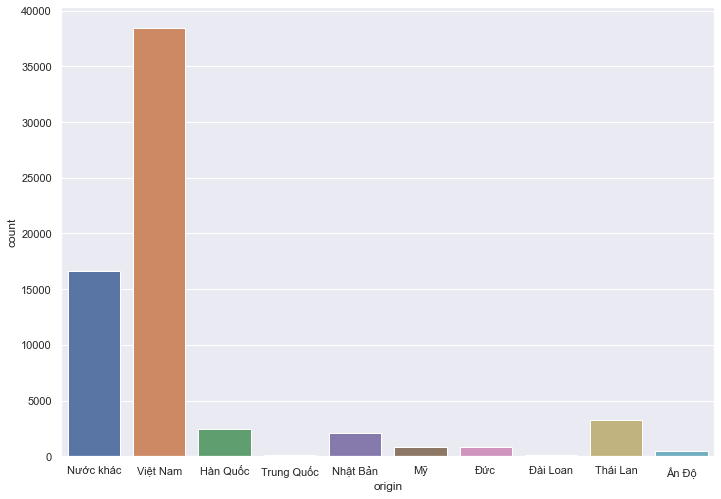

In [5]:
ax = sns.countplot(data.origin)

## Pie Chart of Origin attribute

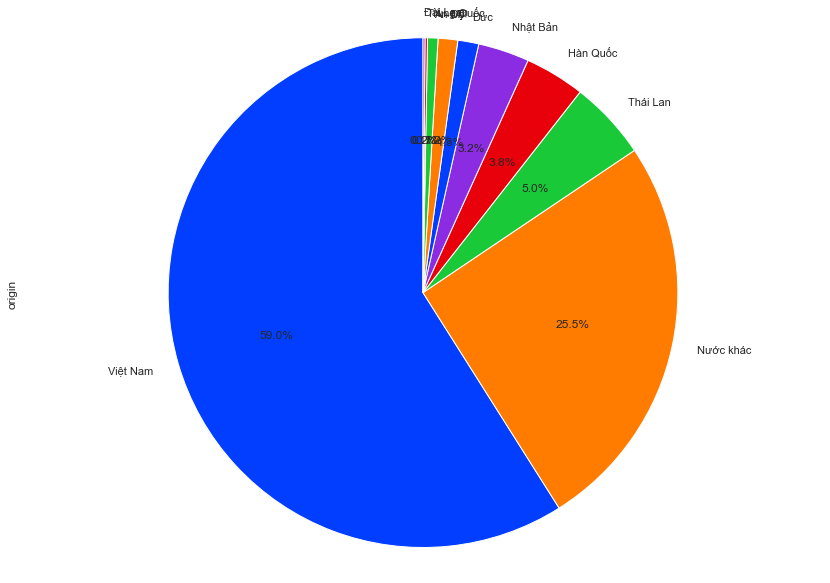

In [6]:
def plot_PieChart(origin_data):


    colors = sns.color_palette('bright')[0:5]
    origin_data.plot.pie(y=origin_data.index,
            shadow=False,
            colors=colors, 
            #explode=(0, 0, 0, 0, 0.15, 0, 0),   # exploding 'Friday'
            startangle=90,
            autopct='%1.1f%%')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
origin_data = data.origin.value_counts()
plot_PieChart(origin_data)

In [ ]:
origin_data = data[['origin', 'car_price']]
mean_price = origin_data.groupby(['origin']).min()
#plot_PieChart(mean_price)
#print(mean_price)
outline = data[data['car_price'] <= 10000000.0]
outline

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68843 entries, 0 to 68842
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        68843 non-null  int64  
 1   description  68843 non-null  object 
 2   origin       65170 non-null  object 
 3   status       68841 non-null  object 
 4   car_mileage  68842 non-null  float64
 5   car_color    65016 non-null  object 
 6   car_seats    67671 non-null  float64
 7   gear         68816 non-null  object 
 8   car_year     68842 non-null  float64
 9   car_price    68778 non-null  float64
 10  style        67312 non-null  object 
 11  model        68540 non-null  object 
 12  fuel         67351 non-null  object 
 13  brand_name   68843 non-null  object 
 14  region_name  54431 non-null  object 
 15  url_image    68455 non-null  object 
 16  website      68843 non-null  object 
 17  month        68843 non-null  int64  
dtypes: float64(4), int64(2), object(12)
memory usa

# STATUS

In [9]:
data.drop(columns=['index', 'description'], axis=1, inplace=True)
data.head(5)

,origin,status,car_mileage,car_color,car_seats,gear,car_year,car_price,style,model,fuel,brand_name,region_name,url_image,website,month
0,Nước khác,Đã sử dụng,120000.0,Đen,6.0,Tự động,2007.0,450000000.0,SUV / Cross over,MDX,Xăng,Acura,Gia Lai,https://cdn.chotot.com/mXCnbhOgz8MATrziNWpTb7d...,chotot,11
1,Nước khác,Đã sử dụng,110000.0,Bạc,3.0,Tự động,2008.0,460000000.0,SUV / Cross over,MDX,Xăng,Acura,Hà Nội,https://cdn.chotot.com/x4XNIm8FY0_eHbx-YEf4SC7...,chotot,9
2,Việt Nam,Đã sử dụng,220.0,Đen,4.0,Số sàn,2004.0,220000000.0,Kiểu dáng khác,Dòng khác,Xăng,Acura,Phú Yên,https://cdn.chotot.com/N38b2el7cufbYZD_afLXmup...,chotot,11
3,Việt Nam,Đã sử dụng,120000.0,Trắng,NaN,Tự động,2017.0,55555555.0,NaN,CL,NaN,Acura,Quảng Ninh,https://cdn.chotot.com/jPaPPwhaq6Qc7y0wkxDLoy4...,chotot,11
4,NaN,Đã sử dụng,100000.0,NaN,NaN,Số sàn,2013.0,300000000.0,NaN,Dòng khác,NaN,Acura,Vĩnh Long,https://cdn.chotot.com/hB3LXQfsrZ4Yj7A1yJzv5uC...,chotot,9


<AxesSubplot:xlabel='car_mileage', ylabel='car_price'>

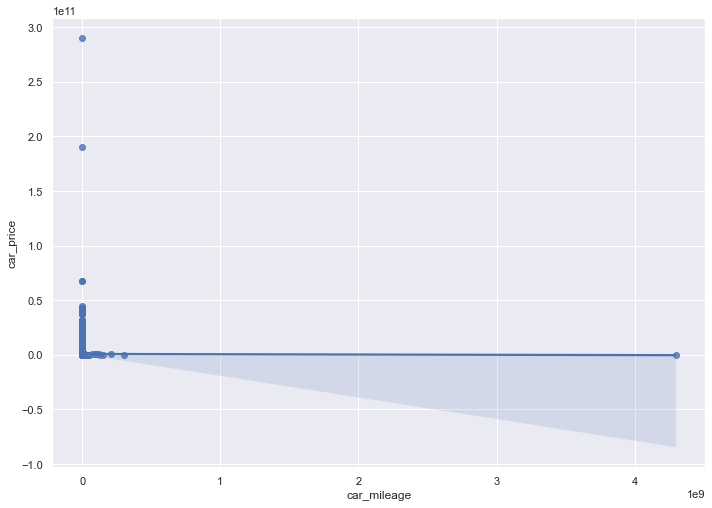

In [10]:
sns.regplot(x='car_mileage', y='car_price', data=data)

In [11]:
data[['car_mileage', 'car_seats', 'car_year', 'car_price', 'month']].corr()

,car_mileage,car_seats,car_year,car_price,month
car_mileage,1.000000,0.002626,-0.008203,-0.002040,-0.005993
car_seats,0.002626,1.000000,-0.022597,0.026391,0.057122
car_year,-0.008203,-0.022597,1.000000,0.175454,0.120333
car_price,-0.002040,0.026391,0.175454,1.000000,0.073542
month,-0.005993,0.057122,0.120333,0.073542,1.000000


<AxesSubplot:xlabel='origin', ylabel='car_price'>

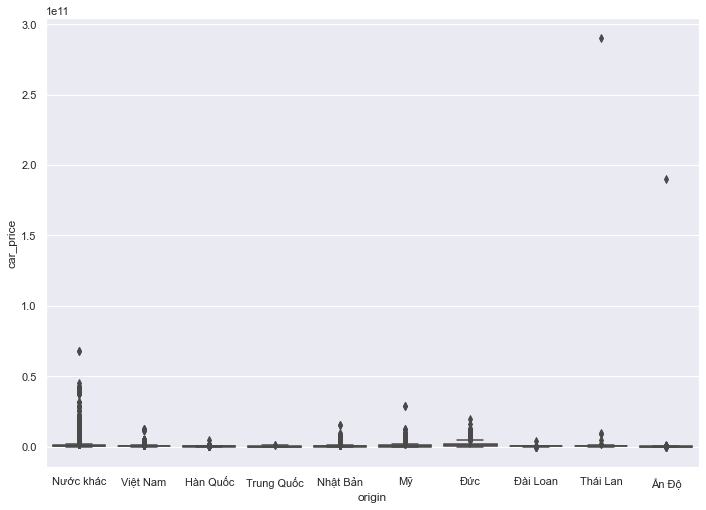

In [12]:
sns.boxplot(x='origin', y='car_price', data=data)

In [34]:
data[data['car_price'] <= 10000000].description.values.tolist()[0:10]

['xe o to gia re tai tphcm sai gon gia dinh',
 'xe o to gia re tai tphcm sai gon gia dinh',
 '-Audi A6 sx2011 máy mới, form mới.\n-Dáng xe cực đẹp theo thời gian, khoang cabin rộng rãi thoải mái, cách âm cực kì tốt, cốp cực kì rộng.\n-Tình trạng xe cực kì tốt, máy số mượt, gầm bệ chắc chắn, 4 cửa hít vẫn hoạt động.\n-Trang bị đầy đủ các tính năng an toàn, mọi chức năng vẫn hoạt động bình thường.\n-Options tiêu biểu như: cửa hít, loa hi-fi, camera lùi, ghế chỉnh điện, điều hoà 2 vùng độc lập,...\n-Đặc biệt xe zin không độ thêm \n⚠️Cam kết xe không đâm đụng, thuỷ kích. Sai cam kết tặng xe\nGiá cạnh tranh: 699 triệu đồng\nLiên hệ: 0901.89.45.46 (zalo/dđ)',
 '-Audi A6 sx2011 máy mới, form mới.\n-Dáng xe cực đẹp theo thời gian, khoang cabin rộng rãi thoải mái, cách âm cực kì tốt, cốp cực kì rộng.\n-Tình trạng xe cực kì tốt, máy số mượt, gầm bệ chắc chắn, 4 cửa hít vẫn hoạt động.\n-Trang bị đầy đủ các tính năng an toàn, mọi chức năng vẫn hoạt động bình thường.\n-Options tiêu biểu như: cửa hí

In [35]:
data[data['car_price'] <= 10000000]

,index,description,origin,status,car_mileage,car_color,car_seats,gear,car_year,car_price,style,model,fuel,brand_name,region_name,url_image,website,month
7,29914,xe o to gia re tai tphcm sai gon gia dinh,NaN,Đã sử dụng,6000.0,NaN,NaN,Tự động,2018.0,6700000.0,NaN,EL,NaN,Acura,Tp Hồ Chí Minh,https://cdn.chotot.com/q6V-danCobyt9as08OPWVG6...,chotot,9
42,29858,xe o to gia re tai tphcm sai gon gia dinh,NaN,Đã sử dụng,6000.0,NaN,NaN,Tự động,2018.0,6700000.0,NaN,EL,NaN,Acura,Tp Hồ Chí Minh,https://cdn.chotot.com/q6V-danCobyt9as08OPWVG6...,chotot,9
158,14164,"-Audi A6 sx2011 máy mới, form mới.\n-Dáng xe c...",Đức,Đã sử dụng,90000.0,Trắng,2.0,Tự động,2011.0,699.0,Sedan,A6,Xăng,Audi,Tp Hồ Chí Minh,https://cdn.chotot.com/jAiK0dt0nypqShqxPjbA0sX...,chotot,11
159,14118,"-Audi A6 sx2011 máy mới, form mới.\n-Dáng xe c...",Đức,Đã sử dụng,90000.0,Trắng,2.0,Tự động,2011.0,699.0,Sedan,A6,Xăng,Audi,Tp Hồ Chí Minh,https://cdn.chotot.com/jAiK0dt0nypqShqxPjbA0sX...,chotot,11
495,7100,Bmw 535 GT nhập mới 2012 mau đỏ full đồ chơi c...,Đức,Đã sử dụng,65000.0,Đỏ,2.0,Bán tự động,2012.0,790000.0,Hatchback,5 Series,Xăng,BMW,Tp Hồ Chí Minh,https://cdn.chotot.com/uwr_zrhC7rY44PpuYj9ia7R...,chotot,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61801,8594,Bán Toyota Corolla altis 2015 bản 1.8G. Xe đi ...,NaN,Đã sử dụng,55000.0,NaN,2.0,Tự động,2015.0,5550000.0,Sedan,Corolla Altis,Xăng,Toyota,Hà Nội,https://cdn.chotot.com/D_VMxi9g-geF18nwjBEkgp-...,chotot,11
62031,7741,- Xe đạt 143 hạng mục kiểm định theo tiêu chuẩ...,Việt Nam,Đã sử dụng,30278.0,Vàng,2.0,Tự động,2019.0,469.0,Sedan,Vios,Xăng,Toyota,Hà Nội,https://cdn.chotot.com/lz_-dLh4OOePXhF5T-VJ7KP...,chotot,11
62344,9198,E bán toyota VIOS G sx 2019 đăng ký 30/12/201...,Việt Nam,Đã sử dụng,16000.0,NaN,NaN,Tự động,2019.0,518.0,Sedan,Vios,Xăng,Toyota,Hà Nội,https://cdn.chotot.com/6u1sI3iy9wXPfxOjaWyWDod...,chotot,11
62359,9953,Do ko có nhu cầu sự dụng gđ cần bán lại chiếc ...,Việt Nam,Đã sử dụng,12000.0,Bạc,6.0,Số sàn,2002.0,135.0,Sedan,Zace,Xăng,Toyota,Nghệ An,https://cdn.chotot.com/vkfPz3Bk-konNLsh3gRy1ND...,chotot,11
